In [25]:
# --- Imports ---
# Import necessary libraries for numerical computing, deep learning, and plotting
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## 0. Initial Setting

In [26]:

# ==== Initial Controls ====

# Function choice: one of {"sin", "cos", "exp", "log", "poly3", "custom"}
FUNC_TYPE = "poly3"

# For poly3, coefficients for y = a*x^3 + b*x^2 + c*x + d
POLY3_COEFFS = {"a": 0.2, "b": -0.5, "c": 0.3, "d": 0.0}

# For custom, define a lambda function
CUSTOM_FUNC = lambda x: x

# Sampling number
N_SAMPLES = 1028

# Model hyperparameters
EPOCHS = 300
INPUT_SIZE = 1
HIDDEN_LAYERS = [64, 32]    # hidden layers could be modified as [64, 32, 128] to add the 3rd hidden layer with 128 neurons
OUTPUT_SIZE = 1

print("Initial settings loaded.")


Initial settings loaded.


## 1. Generate Training Data

We aim to approximate the function **f(x) = sin(x)** using a simple Deep Neural Network (DNN).  
First, we create 100 evenly spaced points in the range \([0, 2\pi]\) and compute their sine values.


In [27]:

import numpy as np

def make_function(func_type: str):
    if func_type == "sin":
        return np.sin, (0, 2*np.pi)
    if func_type == "cos":
        return np.cos, (0, 2*np.pi)
    if func_type == "exp":
        return np.exp, (0, 10)
    if func_type == "log":
        return np.log, (0.01, 10)
    if func_type == "poly3":
        a, b, c, d = POLY3_COEFFS["a"], POLY3_COEFFS["b"], POLY3_COEFFS["c"], POLY3_COEFFS["d"]
        return (lambda x: a*x**3 + b*x**2 + c*x + d), (-3, 3)
    if func_type == "custom":
        return CUSTOM_FUNC, (-5, 5)
    raise ValueError(f"Unknown FUNC_TYPE: {func_type}")

f, (x_min, x_max) = make_function(FUNC_TYPE)

# Use N_SAMPLES instead of fixed 1028
x_train = np.linspace(x_min, x_max, N_SAMPLES).reshape(-1, 1)
y_train = f(x_train)


## 2. Define the DNN Model

We use TensorFlow/Keras to build a feedforward neural network with:
- An input layer that takes scalar values (shape = 1)
- Two hidden layers with 64 and 32 neurons and ReLU activation
- A linear output layer that outputs a single value


In [28]:
# Build model using variables from Section 0
model = keras.Sequential()
keras.Input(shape=(INPUT_SIZE,)),                         # Input layer
for h in HIDDEN_LAYERS[0:]:
    model.add(layers.Dense(h, activation='relu'))         # Hidden layers
model.add(layers.Dense(OUTPUT_SIZE, activation='linear')) # Output layer

## 3. Compile the Model

We compile the model using:
- **Adam optimizer** for efficient training
- **Mean Squared Error (MSE)** as the loss function
- **Mean Absolute Error (MAE)** as an additional evaluation metric


In [29]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 4. Train the Model

We train the model on the generated data for 300 epochs with a batch size of 16. (`EPOCHS = 300` from section "0. Initial Setting")

Verbose is set to 0 to suppress output during training.


In [30]:
# Train the model using parameters from Section 0
history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    batch_size=16,
                    verbose=0)
                                # verbose=0 → silent mode, no output
                                # verbose=1 → one line per epoch (progress bar)
                                # verbose=2 → one line per epoch, no progress bar

## 5. Test the Model

We generate the same range of input values for testing and compare:
- The **true values** of the selected function
- The **predicted values** from the trained DNN


In [31]:

# Generate test data based on the same function setting
f, (x_min, x_max) = make_function(FUNC_TYPE)
x_test = np.linspace(x_min, x_max, 100).reshape(-1, 1)
y_true = f(x_test)
y_pred = model.predict(x_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


## 6. Plot the Results

We visualize how well the DNN approximates the selected function:
- **Blue solid line**: True selected function
- **Red dashed line**: DNN-predicted output


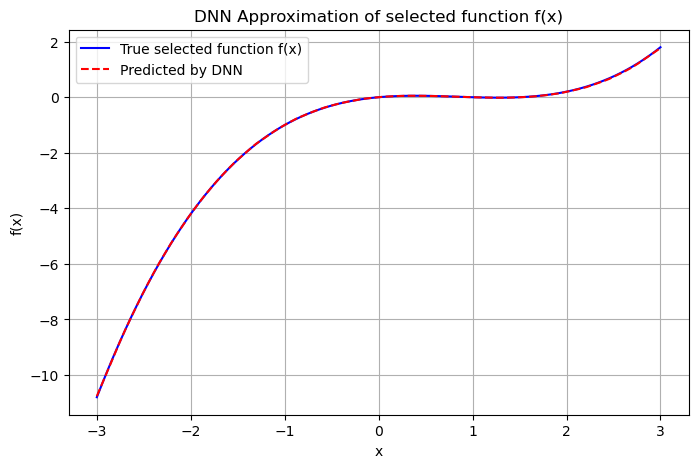

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(x_test, y_true, 'b-', label='True selected function f(x)')
plt.plot(x_test, y_pred, 'r--', label='Predicted by DNN')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('DNN Approximation of selected function f(x)')
plt.legend()
plt.grid(True)
plt.show()